# Main

In [91]:
!pip install xgboost

In [2]:
#library import and set
import warnings
warnings.filterwarnings("ignore")
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('ggplot')

fm.get_fontconfig_fonts()
font_location = 'C:/TIL/Semi-project 1/Semi-project 1 (Titanic survival analysis)/Blank file & Answer files/font.esamanru Medium.ttf' 
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

# matplotlib.rc('font', family=font_name)
# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [3]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

<figure>
    <center> <img src="./images/embark_image.png"  alt='missing' width="600"  ><center/>
<figure/>

In [4]:
y_data = data_df[['Survived']]
# y_data.head(3)

In [5]:
del data_df['Survived']
x_data = data_df.copy()
# x_data.head(3)

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [6]:
# # 기본적인 결측치 채우는 방법
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [7]:
# load a data
data_df = pd.read_csv('titanic.csv')

## EDA

In [8]:
# check df's info 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Analyze Survived 

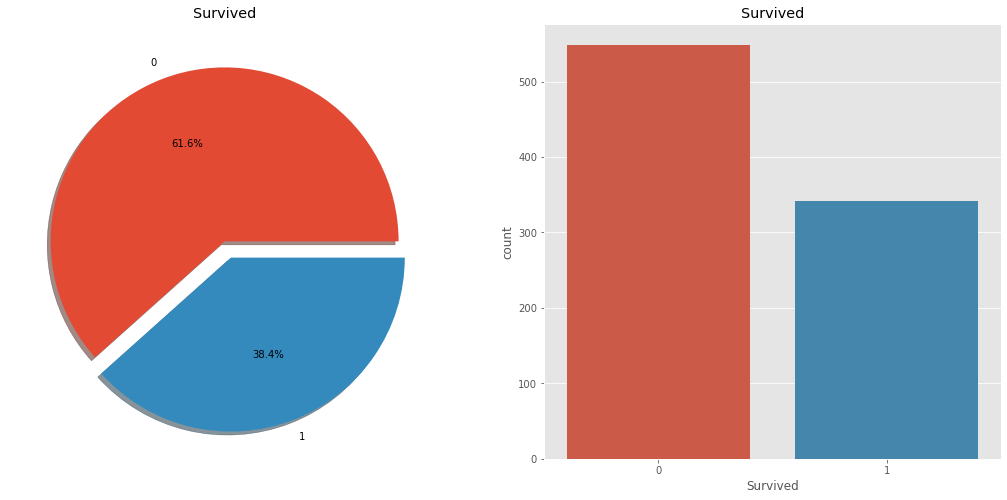

In [11]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

데이터 891개중 61.6% 사망

Categorical Features in the dataset: Sex,Embarked.

Ordinal Features in the dataset: PClass

Continous Features in the dataset: Age




### Sex 

In [12]:
data_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

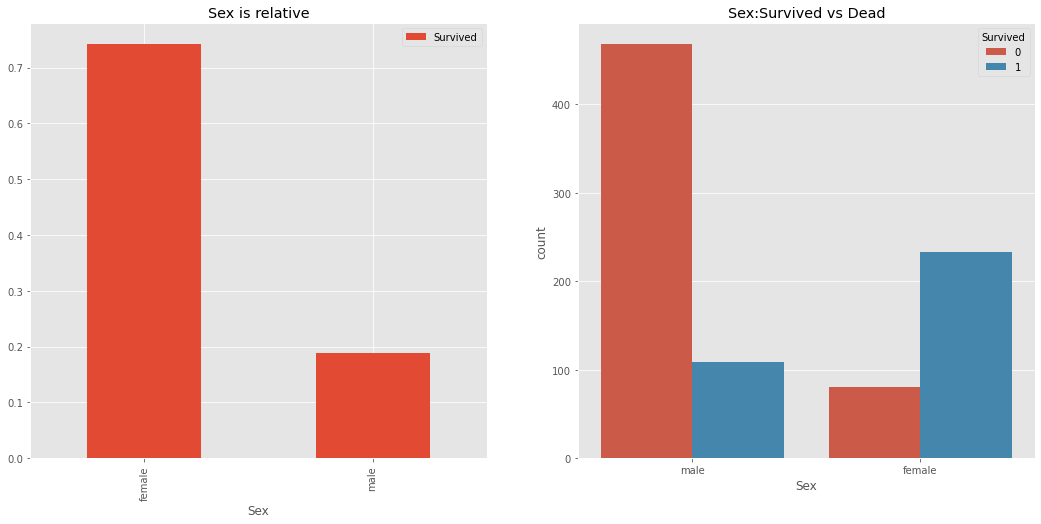

In [13]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex is relative')
sns.countplot('Sex',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

남자일때 죽을 확률이 70%가 넘고 여자일 경우 28%정도로 특성이 나타남. 따라서 유효한 데이터

### PClass (선실등급)

In [14]:
pd.crosstab(data_df.Pclass,data_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


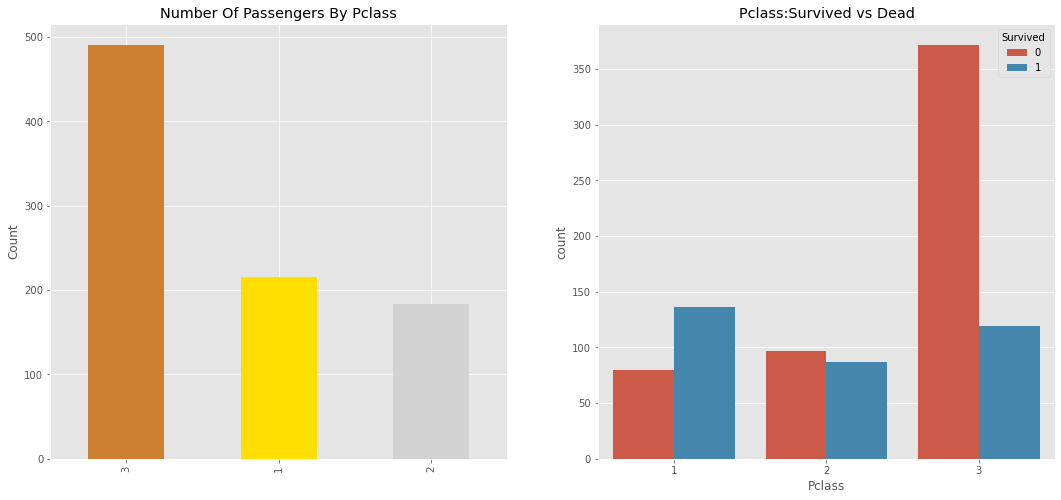

In [15]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

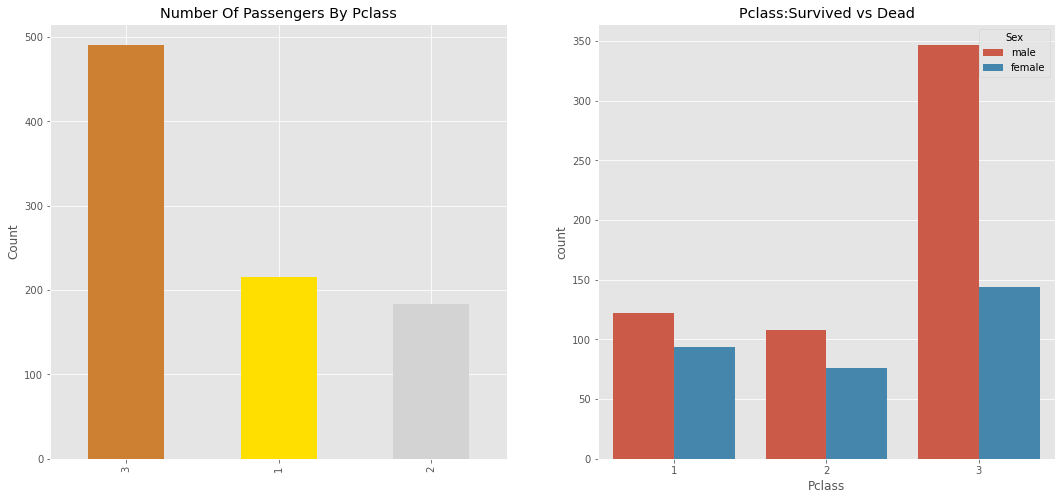

In [16]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Sex',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1등급일때 생존률이 50%이상이고 3등급이면 생존이 20%정도로 떨어짐으로써 유효함이 보임임

In [17]:
pd.crosstab([data_df.Sex,data_df.Survived],data_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

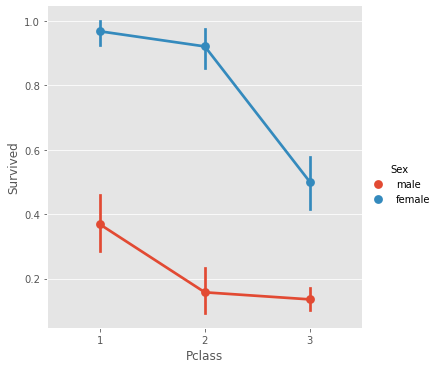

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data_df)
plt.show()

Pclass1 등급이고 남성이면 생존율이 올라감으로써 유효한 특성임

### Age

In [19]:
print('제일 늙은사람의 나이:',data_df['Age'].max(),'Years')
print('제일 어린사람의 나이:',data_df['Age'].min(),'Years')
print('평균나이 ::',data_df['Age'].mean(),'Years')

제일 늙은사람의 나이: 80.0 Years
제일 어린사람의 나이: 0.42 Years
평균나이 :: 29.69911764705882 Years


In [20]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data_df,split=True,ax=ax[0])
ax[0].set_title('성별과 연령 생존' , fontproperties=fprop)
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\TIL\\Semi-project 1\\Semi-project 1 (Titanic survival analysis)\\Blank file & Answer files\\font.esamanru Medium.ttf'

<Figure size 1296x576 with 2 Axes>

### Name

In [24]:
np.count_nonzero(data_df.Name.unique())

891

유니크해서 사용하기 어려움 따라서 영어권 칭호를 분석

In [25]:
data_df['Title'] = data_df.Name.str.extract('\s([A-Za-z]+\.)\s')

In [26]:
data_df['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Sir.           1
Countess.      1
Ms.            1
Mme.           1
Lady.          1
Don.           1
Capt.          1
Jonkheer.      1
Name: Title, dtype: int64

In [27]:
pd.crosstab(data_df.Title,data_df.Sex).T.style.background_gradient(cmap='hot_r') #Checking the Initials with the Sex

Title,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


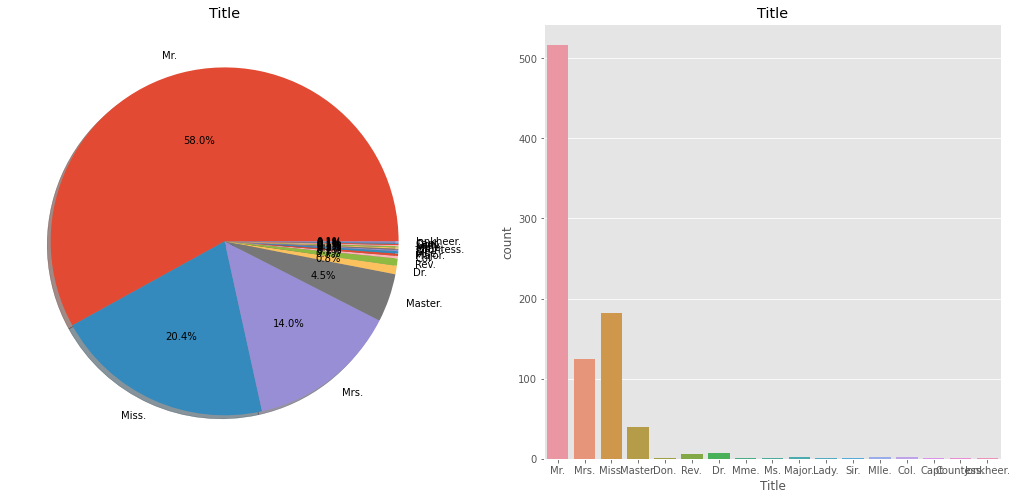

In [28]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Title'].value_counts().plot.pie(autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Title')
ax[0].set_ylabel('')
sns.countplot('Title',data=data_df,ax=ax[1])
ax[1].set_title('Title')
plt.show()

In [29]:
# Title에 따른 Age의 평균및 수 
data_df.groupby('Title').agg({'Age':[np.mean,'count']})

Age      
                mean count
Title                     
Capt.      70.000000     1
Col.       58.000000     2
Countess.  33.000000     1
Don.       40.000000     1
Dr.        42.000000     6
Jonkheer.  38.000000     1
Lady.      48.000000     1
Major.     48.500000     2
Master.     4.574167    36
Miss.      21.773973   146
Mlle.      24.000000     2
Mme.       24.000000     1
Mr.        32.368090   398
Mrs.       35.898148   108
Ms.        28.000000     1
Rev.       43.166667     6
Sir.       49.000000     1

Monsieur" (M.) for a man, The plural is Messieurs (MM. for short).

"Madame" (Mme) for a woman. The plural is Mesdames (Mmes). (= Madame) Mrs

"Mademoiselle" (Mlle) is a traditional alternative for an unmarried woman. The plural is Mesdemoiselles (Mlles).

"Lady" is also a formal title in the United Kingdom. "Lady" is used before the family name of a woman with a title of nobility or honorary title suo jure (in her own right), or the wife of a lord, a baronet, Scottish feudal baron, laird, or a knight, and also before the first name of the daughter of a duke, marquess, or earl.

#### 같은 의미를 뜻하는 칭호 통합 및 마이너 칭호 개수가 6이하를 통합

#### Name 처리 함수

In [30]:

def preprocess_title(title_name):
    title_dict = {
        'Mr.' : ['Mr.'],
        'Miss.' : ['Ms.', 'Mlle.', 'Miss.'],
        'Mrs.' : ['Mrs.', 'Mme.'],
        'etc' : ['Rev.', 'Sir.', 'Dr.', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Jonkheer.', 'Lady.', 'Major.' ],
        'Master.' : ['Master.'],
    }
    for title, list in title_dict.items():
        if title_name in list :
            return title

In [31]:
data_df.Title = data_df.Title.apply(preprocess_title)

In [32]:
data_df.Title.value_counts()

Mr.        517
Miss.      185
Mrs.       126
Master.     40
etc         23
Name: Title, dtype: int64

In [33]:
data_df.drop('Name', inplace=True, axis=1)

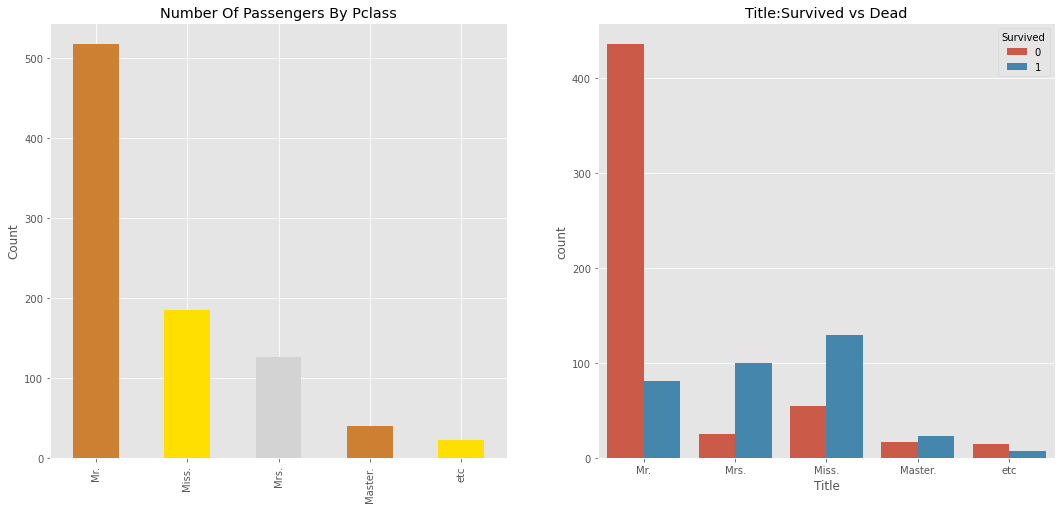

In [34]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Title'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Title',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Title:Survived vs Dead')
plt.show()

### Embarked

<figure>
    <center> <img src="./images/embark_image.png"  alt='missing' width="600"  ><center/>
<figure/>

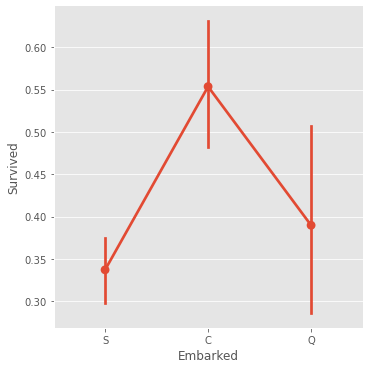

In [35]:
sns.factorplot('Embarked','Survived',data=data_df)
fig=plt.gcf()
plt.show()

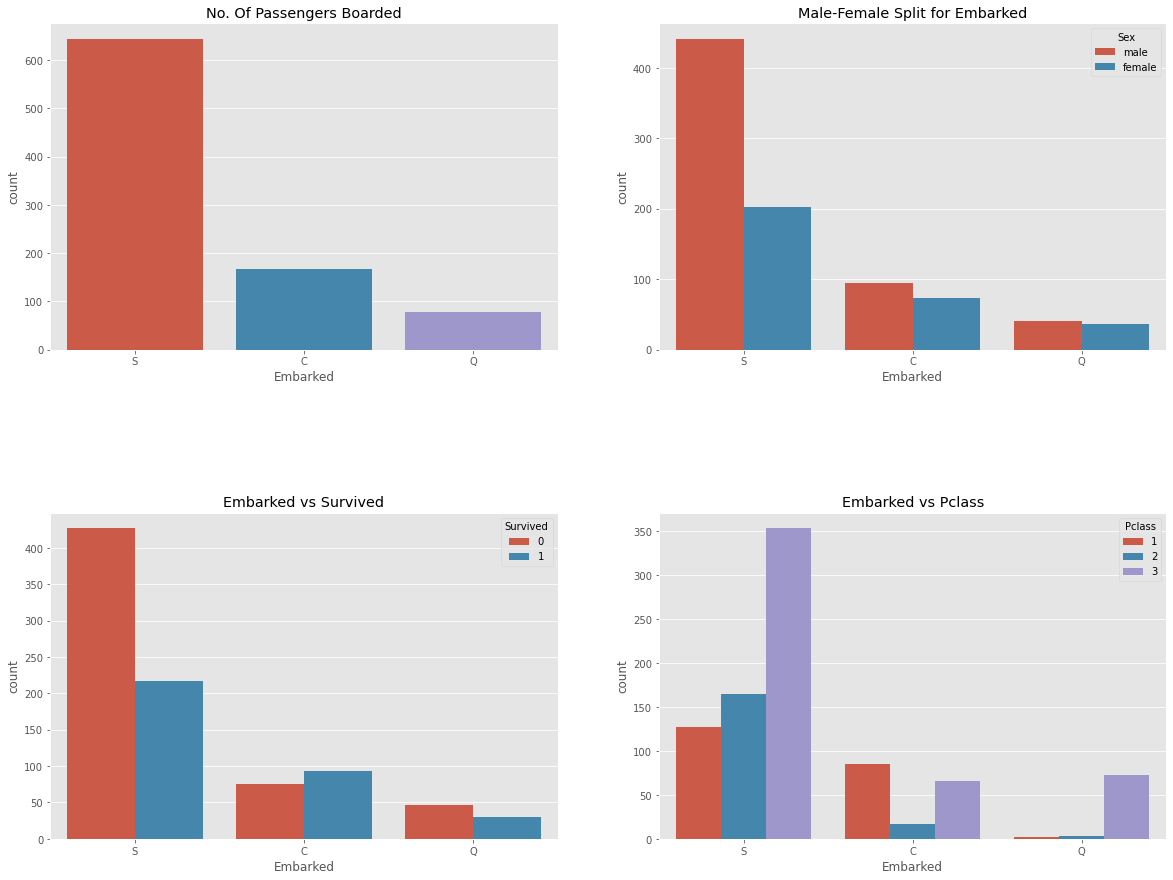

In [36]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data_df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data_df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data_df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data_df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [37]:
data_df.groupby(['Embarked','Pclass']).agg({'Fare':[np.mean,np.std,], })

Fare           
                       mean        std
Embarked Pclass                       
C        1       104.718529  99.093935
         2        25.358335  11.345067
         3        11.214083   4.871528
Q        1        90.000000   0.000000
         2        12.350000   0.000000
         3        11.183393   6.721677
S        1        70.364862  58.811278
         2        20.327439  13.630741
         3        14.644083  13.276609

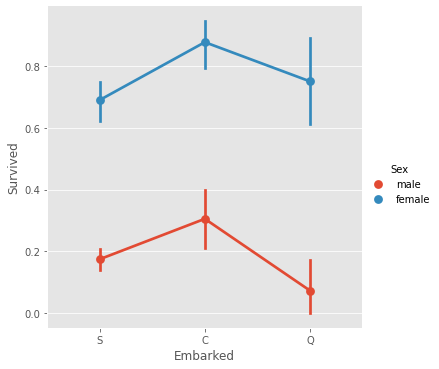

In [38]:
sns.factorplot('Embarked','Survived',hue='Sex',data=data_df)
plt.show()

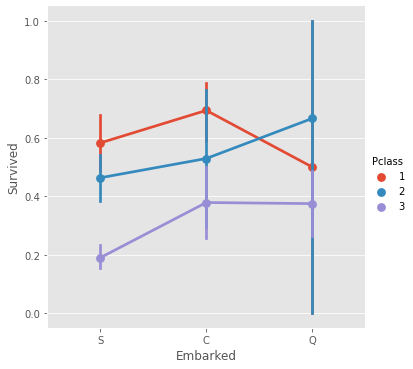

In [39]:
sns.factorplot('Embarked','Survived',hue='Pclass',data=data_df)
plt.show()

In [40]:
data_df[data_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss.
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


In [41]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [42]:
data_df.SibSp

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

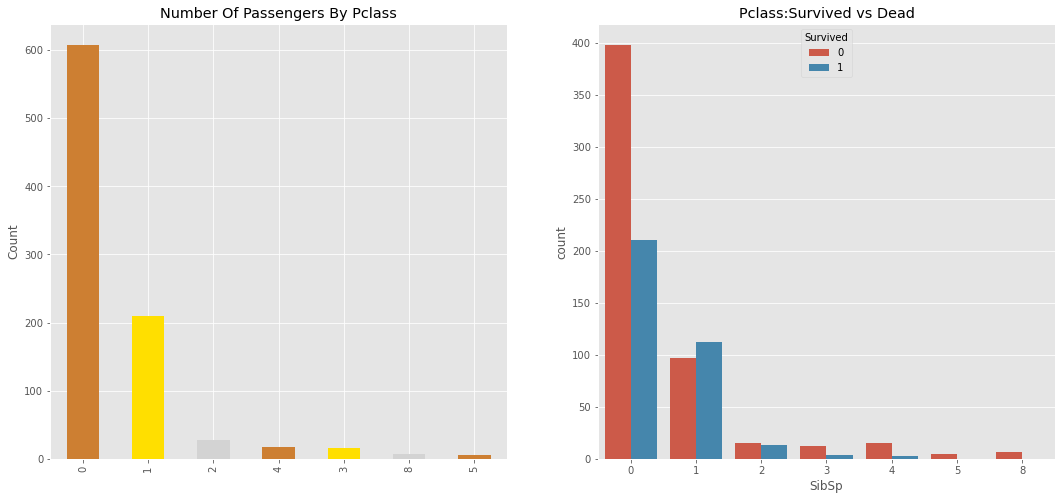

In [43]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['SibSp'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [44]:
data_df.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

### Sibsp

### Parch

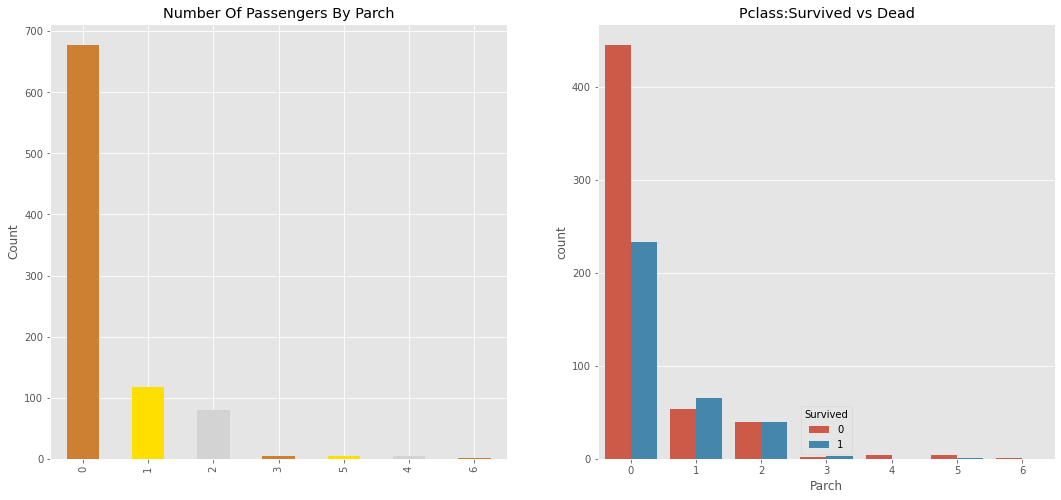

In [45]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Parch'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Parch')
ax[0].set_ylabel('Count')
sns.countplot('Parch',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### Ticket

In [46]:
data_df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

### Cabin

In [47]:
data_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [48]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

## 데이터 전처리

In [49]:
# 전처리용 라이브러 임포트
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Age예측 데이터 생성

In [50]:
# 데이터프레임 백업
# 최빈값으로 결측치 대체 
data_df['Embarked'] =data_df.Embarked.fillna('S')
data_back_df = data_df.copy()
data_df.drop(['PassengerId','Cabin', 'Ticket'], inplace=True, axis=1)

In [51]:
data_df_with_survived = data_df.copy()
data_df.drop('Survived', inplace=True, axis=1)

In [52]:
# 테스트용 df 
test_df = data_df.copy()

### Age Preprocessing Pipeline 

In [53]:
#one Hot encoding col name 유지 하기 
#import warnings
from sklearn.base import BaseEstimator
class PassthroughTransformer(BaseEstimator):
  def fit(self, X, y = None):
    self.cols = X.columns
    return self

  def transform(self, X, y = None):
    self.cols = X.columns
    return X.values

  def get_feature_names(self):
    return self.cols

In [54]:
# 카테고리 원핫인코딩 일괄적용 

#Categories
exclue_age_numeric_features = [ 'SibSp', 'Parch', 'Fare', ]
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model 
numeric_transformer = MinMaxScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore') 

#전처리 파이프라인
categori_preprocessor = ColumnTransformer(
        [('cat', categorical_transformer, categorical_features),
        ('numeri', numeric_transformer, exclue_age_numeric_features)],
        remainder='passthrough'
)


In [55]:
age_test_df = test_df[test_df['Age'].isnull()]
age_train_df =test_df[~test_df['Age'].isnull()]

In [56]:
test_df.shape

(891, 8)

In [57]:
age_train_df.shape[0] + age_test_df.shape[0]

891

In [58]:
#원핫 인코딩후 반환
categori_preprocessor.fit(age_train_df)
trans_age_train_df = categori_preprocessor.transform(age_train_df)
trans_age_null_df = categori_preprocessor.transform(age_test_df)

# 컬럼 내용 처리
tx = categori_preprocessor.get_params()['transformers']

feature_names =[]
for name,transformer,features in tx:
    try:
        Var = categori_preprocessor.named_transformers_[name].get_feature_names().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var

In [59]:
#데이터 프레임으로 반환
trans_age_train_df = pd.DataFrame(trans_age_train_df, columns=feature_names+['Age']) # passthrough한 feature 열이름 추가
trans_age_null_df = pd.DataFrame(trans_age_null_df, columns=feature_names+['Age']) # passthrough한 feature 열이름 추가

In [60]:
trans_age_train_df_x = trans_age_train_df.drop('Age', axis=1)
trans_age_train_df_y = trans_age_train_df['Age']

trans_age_null_df_x = trans_age_null_df.drop('Age', axis=1)

### Age 예측

In [61]:
# Model들 import
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [62]:
# 모델선언
LinearModel = LinearRegression()
LassoModel = Lasso(alpha=1)
RidgeModel = Ridge(alpha=0.1)
xgbrModel = XGBRegressor()


#테스트 셋 분할
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(trans_age_train_df_x, trans_age_train_df_y, random_state=5441)



In [63]:
#모델 훈련 
LinearModel.fit(age_X_train,age_y_train)
LassoModel.fit(age_X_train,age_y_train)
RidgeModel.fit(age_X_train,age_y_train)
xgbrModel.fit(age_X_train,age_y_train)
#모델 테스트 
print("Linear Model")
print("훈련 세트 점수: {:.3f}".format(LinearModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LinearModel.score(age_X_test, age_y_test)))

#과적합을 막는 모델이라서 데이터가 적은곳에서는 사용하기 어려움
print("Lasso Model")
print("훈련 세트 점수: {:.3f}".format(LassoModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LassoModel.score(age_X_test, age_y_test)))

print("Ridge Model")
print("훈련 세트 점수: {:.3f}".format(RidgeModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(RidgeModel.score(age_X_test, age_y_test)))

print("XGB Regressor")
print("훈련 세트 점수: {:.3f}".format(xgbrModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(xgbrModel.score(age_X_test, age_y_test)))

Linear Model
훈련 세트 점수: 0.429
테스트 세트 점수: 0.369
Lasso Model
훈련 세트 점수: 0.229
테스트 세트 점수: 0.234
Ridge Model
훈련 세트 점수: 0.433
테스트 세트 점수: 0.381
XGB Regressor
훈련 세트 점수: 0.794
테스트 세트 점수: 0.230


In [64]:
LinearModel.predict(trans_age_null_df_x)

array([36.875, 35.   , 28.5  , 27.375, 23.875, 30.5  , 38.75 , 23.875,
       27.375, 27.375, 30.5  , 34.625, 23.875, 23.   , 44.375, 41.375,
        2.625, 30.5  , 30.5  , 23.875, 30.5  , 30.5  , 30.5  , 30.5  ,
       21.5  , 30.5  , 36.875, 12.   , 28.25 , 30.5  , 30.5  , -9.875,
       45.375, 44.5  ,  1.25 , -0.375, 31.875, 44.25 , 35.875, 36.875,
       23.875, 12.625, 34.75 , 30.5  , 10.875, 17.5  , 12.   , 21.625,
       30.5  , 41.875, 36.875, 23.875, 44.5  , 23.875, 35.125, 44.5  ,
       41.375, 44.5  , 23.875, 32.5  , 28.375, 30.5  , 27.125, 12.625,
       19.5  , 42.25 , 30.5  , 29.5  , 44.375, 27.375, 23.875, 23.875,
       34.625, 28.5  , 23.875, 39.625, 30.5  , 36.875, 10.875, 30.5  ,
       36.875, 35.125, 31.75 , 27.375, 30.5  , 36.875, 29.5  , 30.5  ,
       28.25 , 30.5  , 43.25 , 36.875, 30.5  , 35.125, 36.875, 30.5  ,
       44.125, 35.125, 10.875, 28.25 , 27.375, 30.375, 23.875, 44.5  ,
       30.5  , 36.625, 27.375, 27.375, 41.875, 27.375, 28.25 , 30.375,
      

In [65]:
RidgeModel.predict(trans_age_null_df_x)

array([ 36.76323471,  33.96700459,  30.0721545 ,  27.1712263 ,
        25.58469671,  30.11443418,  40.01573226,  25.58633877,
        27.17117292,  27.16270082,  30.11247439,  34.53319143,
        25.58633877,  22.70642709,  43.61809519,  40.76523097,
         1.52825327,  30.11443418,  30.11247439,  25.58586216,
        30.11247439,  30.11247439,  30.11443418,  30.11596948,
        23.23735688,  30.11247439,  36.77223679,  13.58889187,
        29.84310764,  30.12184759,  30.10468987, -11.25757332,
        46.20763607,  43.73978793,   0.06899023,   0.89346106,
        30.9892169 ,  43.43380854,  37.43411963,  36.77223679,
        25.58633877,  12.07935909,  34.63168946,  30.11443418,
        12.22002461,  18.93293108,  13.75290198,  23.3472934 ,
        30.12264193,  43.01188819,  36.77223679,  25.58633877,
        43.6752876 ,  25.58633877,  34.1322271 ,  43.73883472,
        40.76523097,  43.68164231,  25.58633877,  32.29414606,
        29.44531726,  30.11247439,  28.52238547,  12.07

In [66]:
# 리니어 모델 weight값과 bias
linear_wb = pd.DataFrame(LinearModel.coef_, index=feature_names).T
linear_wb['bias'] = LinearModel.intercept_
linear_wb

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,3.587193e+13,3.587193e+13,3.587193e+13,-3.773290e+14,-3.773290e+14,-1.455075e+13,-1.455075e+13,-1.455075e+13,-2.646869e+14,-2.646869e+14,-2.646869e+14,-2.646869e+14,-2.646869e+14,-10.615234,-0.408804,-6.816406,6.206947e+14


In [67]:
# 릿지 모델 weight값과 bias
ridge_wb = pd.DataFrame(RidgeModel.coef_, index=feature_names).T
ridge_wb['bias'] = RidgeModel.intercept_
ridge_wb

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,7.930516,-2.006537,-5.923979,-7.236356,7.236356,-4.186472,5.421211,-1.234739,-24.224624,2.399121,-0.887692,16.485948,6.227247,-10.702737,-0.381321,-6.511409,31.024839


**모델의 w,b값을 확인결과 x3_Master의 가중치가 -인 RidgeModel이 더 합리적이라서 Ridge 모델을 Age예측에 채택**

In [68]:
data_df_with_survived.loc[data_df_with_survived['Age'].isna(), 'Age'] =np.round(RidgeModel.predict(trans_age_null_df_x),0)

In [69]:
data_df_with_survived.to_csv('no_na_titanic_df.csv')

In [70]:
data_df_with_survived.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [71]:
# 아직해야할거 테스트 스플릿이랑 데이터 파이프라인 

In [72]:
titan_df = pd.read_csv('no_na_titanic_df.csv')
train_test_split(titan_df,random_state=0, test_size=0.3)

[     Unnamed: 0  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
 857         857         1       1    male  51.0      0      0  26.5500   
 52           52         1       1  female  49.0      1      0  76.7292   
 386         386         0       3    male   1.0      5      2  46.9000   
 124         124         0       1    male  54.0      0      1  77.2875   
 578         578         0       3  female  28.0      1      0  14.4583   
 ..          ...       ...     ...     ...   ...    ...    ...      ...   
 835         835         1       1  female  39.0      1      1  83.1583   
 192         192         1       3  female  19.0      1      0   7.8542   
 629         629         0       3    male  37.0      0      0   7.7333   
 559         559         1       3  female  36.0      1      0  17.4000   
 684         684         0       2    male  60.0      1      1  39.0000   
 
     Embarked    Title  
 857        S      Mr.  
 52         C     Mrs.  
 386        S  Master. 

In [73]:
titan_df.drop('Unnamed: 0', inplace=True,axis=1)

In [74]:
titanic_x =titan_df.drop('Survived', axis=1)
titanic_y = titan_df['Survived']

In [75]:
titanic_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,female,26.0,0,0,7.9250,S,Miss.
3,1,female,35.0,1,0,53.1000,S,Mrs.
4,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,etc
887,1,female,19.0,0,0,30.0000,S,Miss.
888,3,female,16.0,1,2,23.4500,S,Miss.
889,1,male,26.0,0,0,30.0000,C,Mr.


### 원핫 인코딩, 스케일러 적용

In [76]:
# 카테고리 원핫인코딩 일괄적용 

#Categories
exclue_age_numeric_features = [ 'SibSp', 'Parch', 'Fare', ]
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model 
numeric_transformer = MinMaxScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore') 

#전처리 파이프라인
categori_preprocessor = ColumnTransformer(
        [('cat', categorical_transformer, categorical_features),
        ('numeri', numeric_transformer, exclue_age_numeric_features)],
        remainder='passthrough'
)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>
  
# XGBoost

In [199]:
# 모델 import 

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score
import os

#### 작업디렉토리 변경

In [202]:
os.chdir('C:/TIL/Semi-project 1/Semi-project 1 (Titanic survival analysis)/Blank file & Answer files/titanic_scaled_data')

In [203]:
print(os.getcwd())

C:\TIL\Semi-project 1\Semi-project 1 (Titanic survival analysis)\Blank file & Answer files\titanic_scaled_data


<br>

## 4. Train the model

In [205]:
# 모델 선언 및 fit


model = xgb.XGBClassifier()

X_train = pd.read_csv('./scaled_train.csv')
y_train = pd.read_csv('./train_y.csv')
X_test = pd.read_csv('./scaled_test.csv')
y_test = pd.read_csv('./test_y.csv')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [206]:
# 예측

y_pred = model.predict(X_test)
print(y_pred)


[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]


In [207]:
# 예측결과, 실제결과 비교 

# 모델이 예측한 값
y_pred = model.predict(X_test)

result = pd.DataFrame({'y_test': y_test['Survived'], 'y_pred': y_pred})
print(result)


     y_test  y_pred
0         0       0
1         0       0
2         0       0
3         1       1
4         1       1
..      ...     ...
263       0       0
264       0       0
265       0       0
266       1       0
267       0       0

[268 rows x 2 columns]


In [208]:
# 모델 정확도 확인

y_pred_binary = [int(pred >= 0.5) for pred in y_pred]
accuracy = accuracy_score(y_test['Survived'], y_pred_binary)

print('Accuracy:', accuracy)

mse = mean_squared_error(y_test, y_pred)
    
print('MSE:', mse)


Accuracy: 0.8283582089552238
MSE: 0.17164179104477612


#### 정확도 약83%, MSE 17% 

<br>
<br>

## 그리드 서치로 하이퍼 파라미터 조정

In [209]:
from sklearn.model_selection import GridSearchCV

# 모델 생성
model = XGBRegressor()

# 그리드 서치를 위한 하이퍼파라미터 조합 지정
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]}

# 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best hyperparameters:', grid_search.best_params_)

# 최적의 모델로 예측 수행
y_pred = grid_search.predict(X_test)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [210]:
# 파라미터 값 수정
params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

model = xgb.XGBRegressor(**params)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [211]:
# 새로운 하이퍼 파라미터로 정확도 체크

y_pred_binary = [int(pred >= 0.5) for pred in y_pred]
accuracy = accuracy_score(y_test['Survived'], y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
    

print('Accuracy:', accuracy,
      'MSE:', mse)

Accuracy: 0.8395522388059702 MSE: 0.12293245990276866


#### 정확도 약 84%, MSE 12.2로 향상

<br>
<br>

## ROC EDA

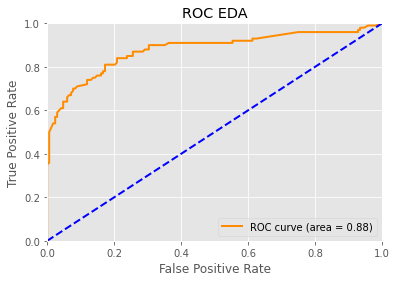

In [212]:
y_pred_prob = model.predict(X_test)

# FPR, TPR, 임계값(thresholds) 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC 값 계산
roc_auc = auc(fpr, tpr)

# ROC Curve EDA
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EDA')
plt.legend(loc="lower right")
plt.show()


<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)